PHYS/BIOL 212 Final Exam: Spring 2022

Atwood 215, 3-5:30 PM, Wednesday, May 4, 2022


--- 

In this exam, you will write code to explore the behavior of the model described below. You are welcome to use the help commands within colab, as well as two 8.5 x 11 inch sheets of handwritten notes (front and back) that you brought with you and will be required to turn in at the end of the exam period.  No other materials are allowed. Upon opening this notebook, expand this window into full screen mode and close all other tabs. Answer questions as thoroughly as you can, and explain your expectations and thought processes whenever possible, even and especially if your code is not working, as partial credit will be awarded for partial answers. **I strongly encourage you to read through the entire exam before starting, as some questions parts are more qualitative and can be answered without the completion of previous parts.**

---
---

A one-parameter model for the spread of forest fires includes the following:

An $N \times N$ lattice of sites, each of which can have one of three possible values: empty (0), tree (1), or fire (2). In this model, there is an initial population of trees and empty sites within the lattice, where the density of trees, $\rho_{tree} $, is a parameter that is specified. If a tree is on fire, then in the next time step, the fire spreads from this tree to any of the four neighboring lattice sites with trees (empty sites cannot catch fire). Afterward, the original tree dies, making the lattice space empty. The simulation ends either when the maximum number of iterations, $T$, has been reached, or when the fire is extinguished, whichever comes first. 


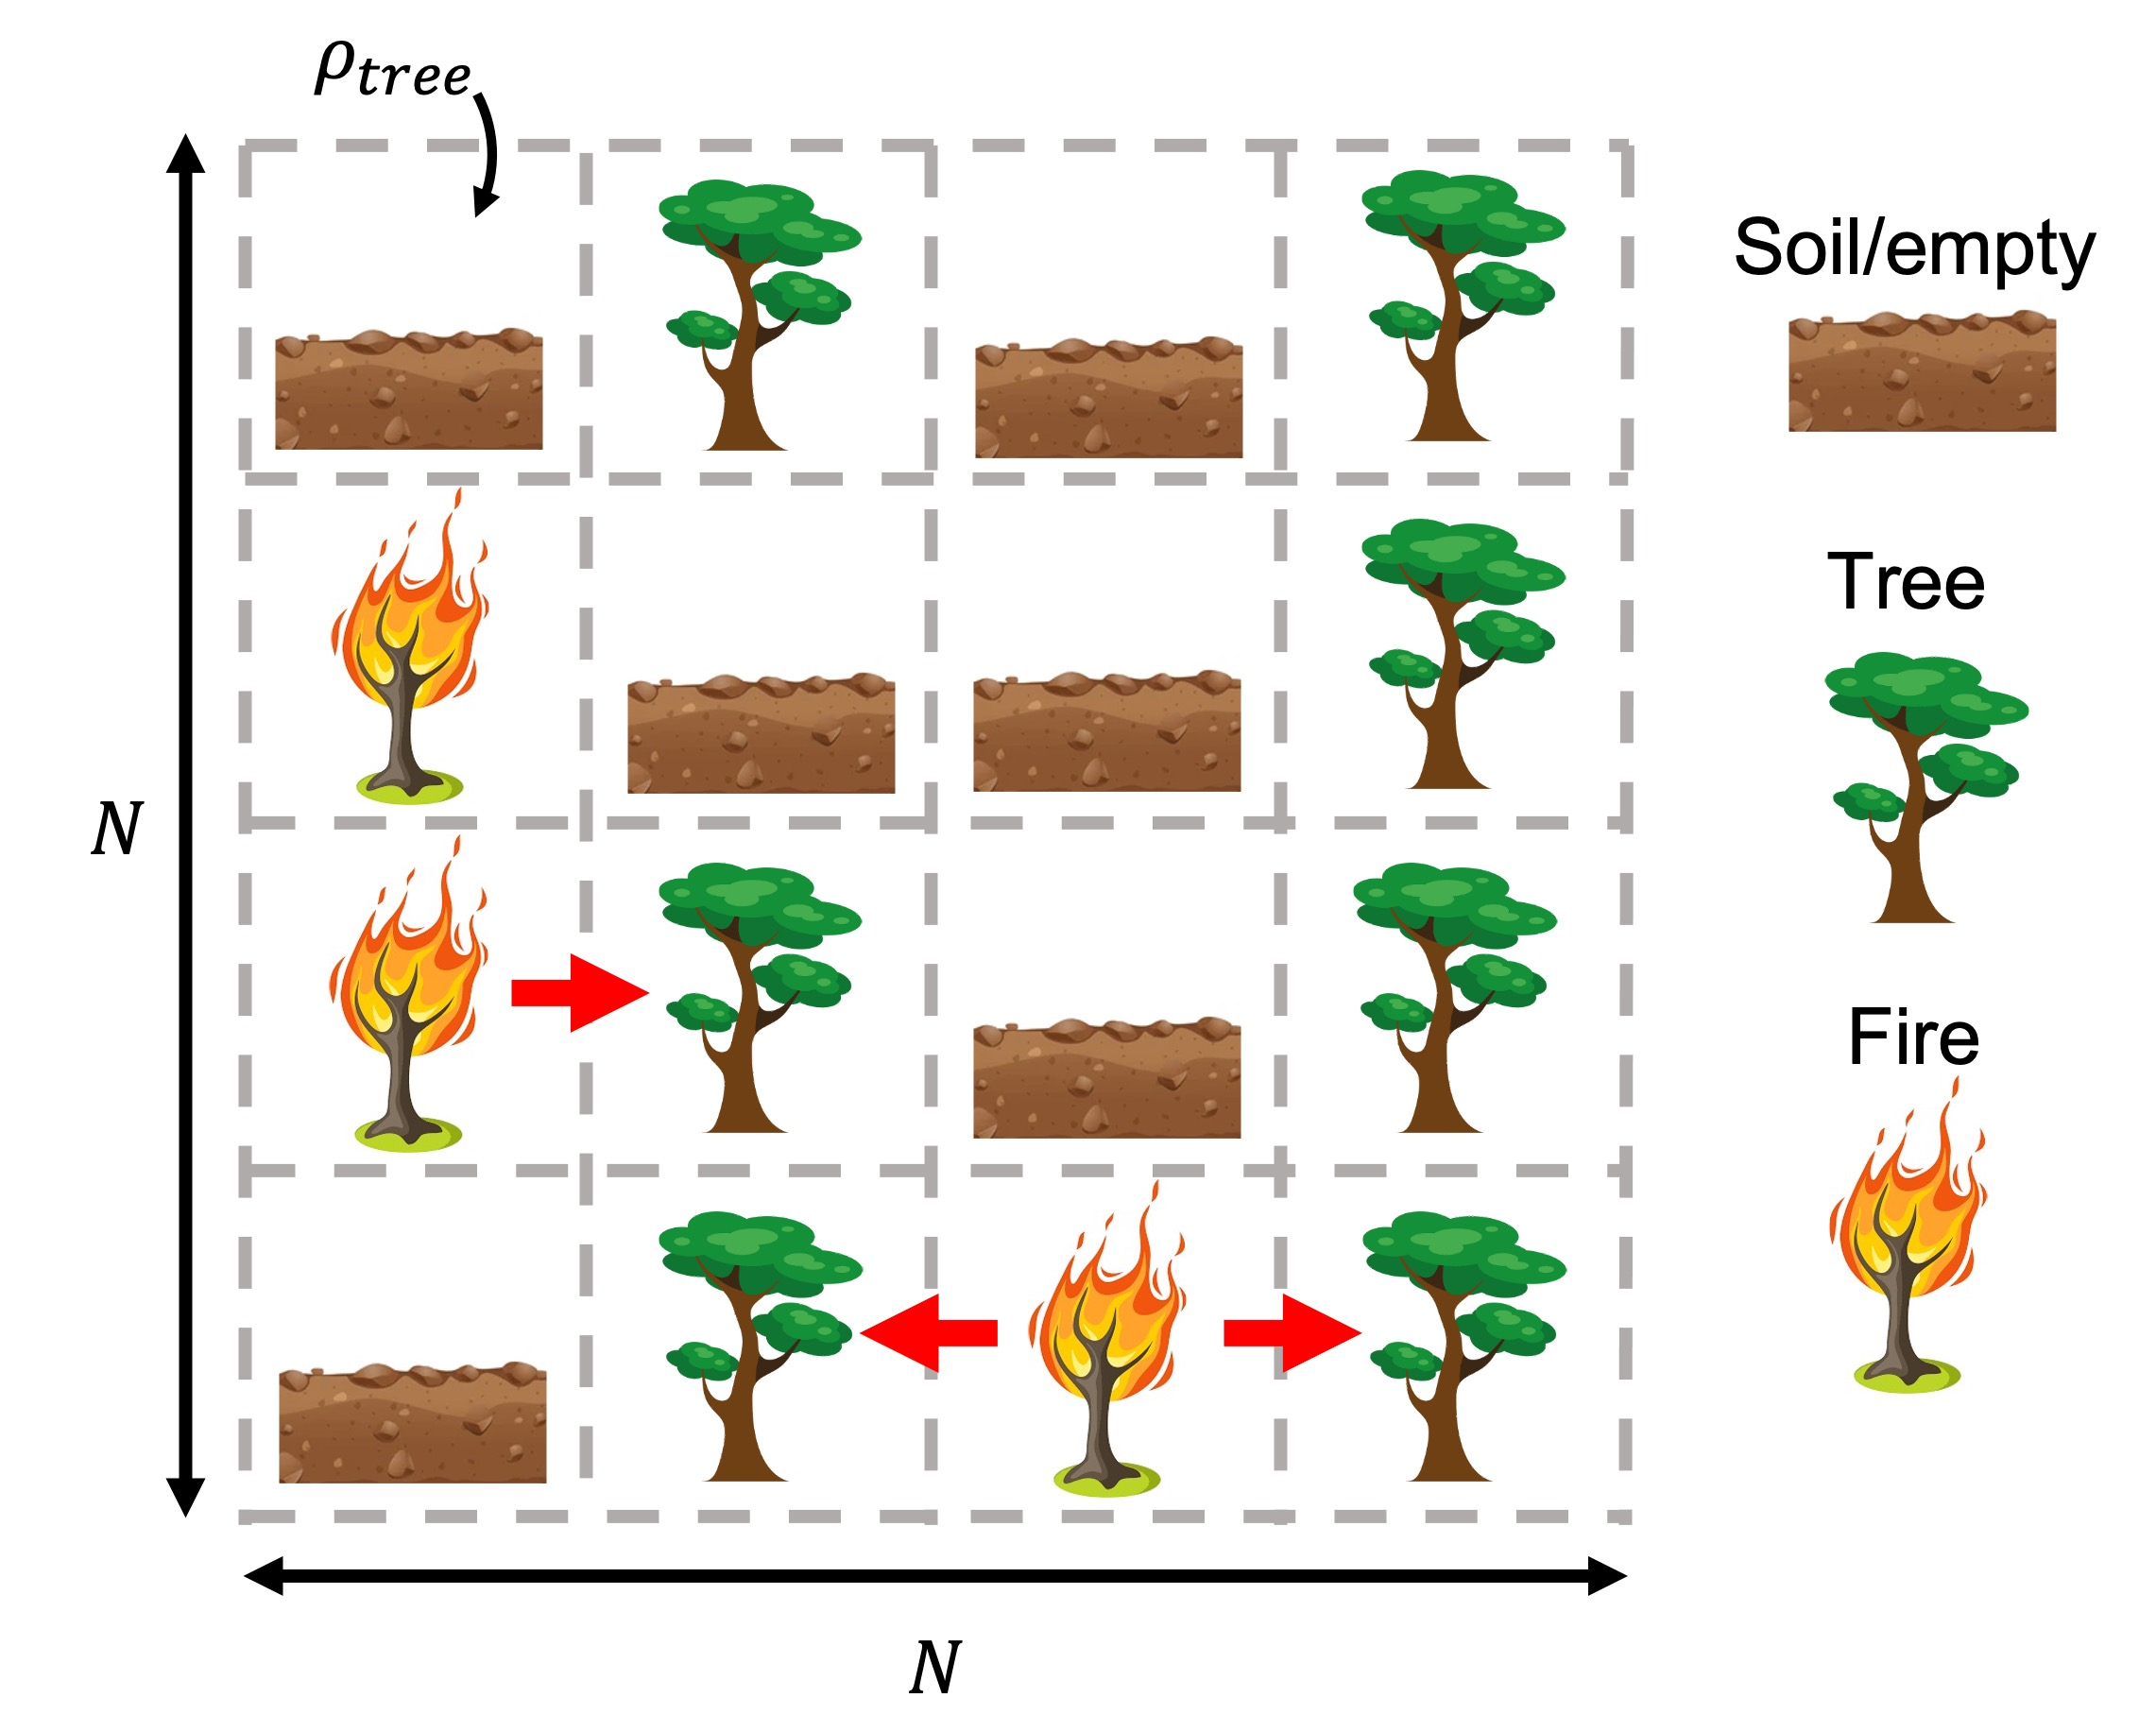

*Throughout this exam, you'll implement this model and then answer some questions based on parameter variation. For your implementation, assume the following: (1) The forest has a finite extent (i.e., boundary conditions are not periodic) and (2) The fire starts with all trees in the zeroth row, and spreads from there.*

---

In [104]:
### libraries you'll need:
# numpy
import numpy as np
import numpy.random as nprnd

# plotting
import matplotlib.pyplot as plt

# animations
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


---

(a) Start by creating a forest with a given tree density, $\rho_{tree}$  (which is equivalent to the probability of each site being occupied by a tree). This should be an $N \times N$ array of randomly placed trees (which have a pixel value equal to 1) and empty spaces (which have a pixel value equal to 0). The tree density, $\rho_{tree}$, should be a parameter that can be varied. Create colormaps of forests for $N = 100$, $\rho_{tree} = 0.1$ and $\rho_{tree} = 0.9$. Include a colorbar (with color range from 0 to 2), label the axes, include a title for each image, and make the aspect ratio of the image square. Calculate the number of trees divided by the area of the forest, $N_{tree} / A_{forest}$, to confirm that it (approximately) matches $\rho_{tree}$. 

In [105]:
def generate_forest(N:int, p_tree: int):
  seed = np.random.random(size=(N, N))
  forest = np.zeros([N, N])

  for i in range(0, N):
    for j in range(N):
      if seed[i, j] < p_tree:
        forest[i, j] = 1
      else:
        forest[i, j] = 0
  return forest

In [106]:
N = 100
forest1 = generate_forest(N, 0.1)
forest2 = generate_forest(N, 0.9)

Ratio of trees to empty 0.0999


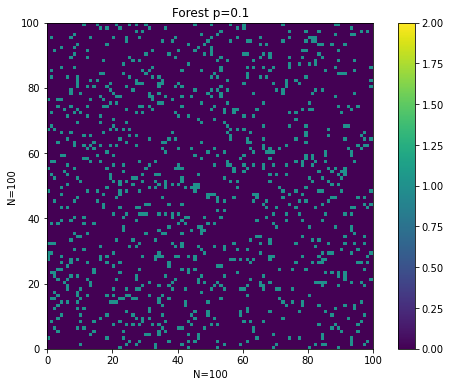

In [107]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot()
ax.axis('square')

ax.set(xlim = (0, N), ylim = (0, N), xlabel = "N=100", ylabel = "N=100", title="Forest p=0.1")

x = np.arange(0, N + 1)
y = np.arange(0, N + 1)
clr = ax.pcolor(x, y, forest1, vmin=0, vmax=2)
plt.colorbar(clr)  
ax.imshow(forest1)

print(f"Ratio of trees to empty {np.sum(forest1 == 1) / (N * N)}")

Ratio of trees to empty 0.8976


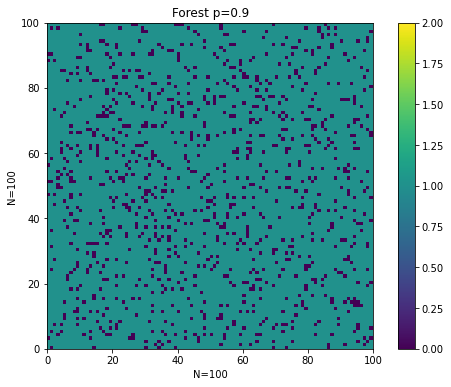

In [108]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot()
ax.axis('square')

ax.set(xlim = (0, N), ylim = (0, N), xlabel = "N=100", ylabel = "N=100",  title="Forest p=0.9")

x = np.arange(0, N + 1)
y = np.arange(0, N + 1)
clr = ax.pcolor(x, y, forest2, vmin=0, vmax=2)
plt.colorbar(clr)  
ax.imshow(forest2)
print(f"Ratio of trees to empty {np.sum(forest2 == 1) / (N * N)}")

(b) Start a forest fire by setting all trees in the zeroth row of your forest on fire (use pixel values of two to specify fire). Display your ignited forests from part (a), and include titles, axis labels, and colorbars with range from 0 to 2.

In [109]:
def fuego(forest, start=-1):
  f = np.copy(forest)
  for i in range(len(forest[start])):
    if f[start, i] == 1:
      f[start, i] = 2
  return f

fire_forest1 = fuego(forest1)
fire_forest2 = fuego(forest2)

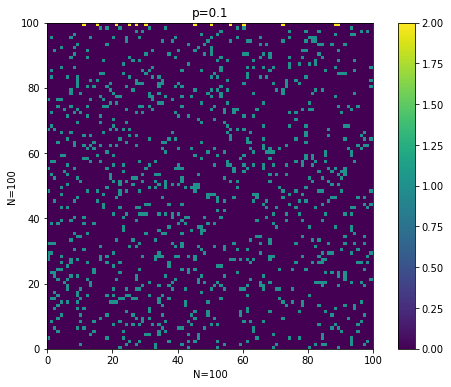

In [110]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot()
ax.axis('square')

ax.set(xlim = (0, N), ylim = (0, N), xlabel = "N=100", ylabel = "N=100", title="p=0.1")

x = np.arange(0, N + 1)
y = np.arange(0, N + 1)
clr = ax.pcolor(x, y, fire_forest1, vmin=0, vmax=2)
plt.colorbar(clr)  
ax.imshow(fire_forest1)

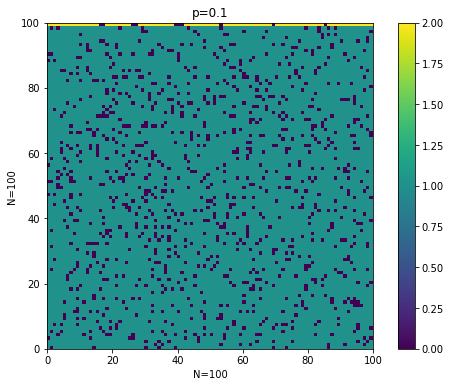

In [111]:
fig = plt.figure(figsize = (9, 6))
ax = plt.subplot()
ax.axis('square')

ax.set(xlim = (0, N), ylim = (0, N), xlabel = "N=100", ylabel = "N=100", title="p=0.1")

x = np.arange(0, N + 1)
y = np.arange(0, N + 1)
clr = ax.pcolor(x, y, fire_forest2, vmin=0, vmax=2)
plt.colorbar(clr)  
ax.imshow(fire_forest2)

(c) Using the schematic above as a guide, write pseudocode to outline the structure of and explain the steps to run a simulation that iteratively spreads the fire.

```
For every iteration
  observe a specific cell (starting with row of trees on fire)
  if the cell is on fire
    observe the 4 neighbors to that cell
    if a tree exists in neighbor (pixel = 1)
      set tree on fire
    extinguish ourself
```
    

(d) Explain your expectations for the behavior of fire as a function of the parameter $\rho_{tree}$. What do you think will happen if the density of trees in the forest is low? high? intermediate? 

> I think the higher $p_{tree}$ the more likely the fire can spread. The lower $p_{tree}$ the less likely the fire can spread and become extinguished quickly preventing the fire from spreading throughout the system. 

(e) Use your answers from (a)-(c) to create a function that simulates the spread of a forest fire. Your function should have the following inputs:

$N$ = linear size of forest

$\rho_{tree}$ = the initial density of trees in the forest (which is equivalent to the probability of each site being occupied by a tree)

$T$ = maximum number of iterations to run the simulation

Define the forest at the zeroth iteration to be consistent with part (a), and the first iteration to be consistent with part (b). Your simulation should then iterate through the second to $T$ time steps. 

Your function should output an $N \times N \times T_{steps}$ array that contains of the state of the forest at each time step, where $T_{steps}$ is equal to the minimum of $T$ (maximum number of specified iterations) and $T_{extinguish}$ (the number of iterations before the fire dies out) as well as the final density of trees in the forest.

In [112]:
def burn_the_forest_inator_1000(N, p_tree, T):
  sim = np.zeros([N, N, T])
  sim[:, :, 0] = generate_forest(N, p_tree)
  sim[:, :, 1] = fuego(sim[:, :, 0])

  for t in range(2, T):
    sim[:, :, t] = sim[:, :, t - 1]

    fire_loc = np.where(sim[:, :, t] == 2)

    if len(fire_loc[0]) == 0:
      return sim[:, :, 0:t] # we extinguished early :(

    for row, col in zip(fire_loc[0], fire_loc[1]):
      # Check top neighbor
      if sim[min(row + 1, N - 1), col, t] == 1:
        sim[min(row + 1, N - 1), col, t] = 2
      # Check bottom neighbor
      if sim[max(row - 1, 0), col, t] == 1:
        sim[max(row - 1, 0), col, t] = 2
      # Check right neighbor
      if sim[row, min(col + 1, N - 1), t] == 1:
        sim[row, min(col + 1, N - 1), t] = 2
      # Check left neighbor
      if sim[row, max(col - 1, 0), t] == 1:
        sim[row, max(col - 1, 0), t] = 2
      
      # extinguish ourselves
      sim[row, col, t] = 0
  return sim

(f) Run your code for $N = 100$, $\rho_{tree} = 0.7$, $T = 1000$. Use the code provided below to make an animation of the fire dynamics.

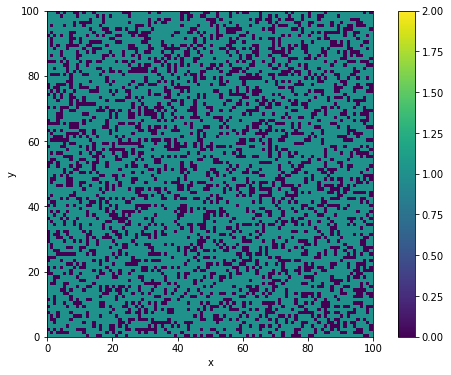

In [113]:
### code to create an animation
forest = burn_the_forest_inator_1000(100, 0.7, 1000)

# initialize figure
fig = plt.figure(figsize=(9,6))
ax = plt.subplot() 
ax.axis('square')
ax.set(xlim=(0,N),ylim=(0,N),xlabel='x',ylabel='y')

# define x- and y- axis values
x = np.arange(0,N+1)
y = np.arange(0,N+1)

# get the dimensions of the forest, specifically want the the number of iterations
sz = np.shape(forest)
iter = sz[2]

ims = []
for i in range(0,iter,1):
    trees = forest[:,:,i]
    im=ax.pcolor(x,y,trees, vmin=0, vmax=2, animated=True)
    
    if i == 0:
        # add the colorbar only to the first image
        ax.pcolor(x,y,trees, vmin=0, vmax=2)  # show an initial one first
        plt.colorbar(im)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50,repeat_delay=1000)

In [114]:
HTML(ani.to_jshtml())

(g) Calculate the final density of trees for $\rho_{tree}$ from 0.05 to 1, with spacing 0.05. How do you expect the ratio of final density / initial density to depend on the initial tree density and why? Make a plot of final densities normalized by initial densities vs initial densities. Does your plot agree with your expectations? Qualitatively, what happens to the fire and the forest as the tree density increases? Does this agree with your expectations from part (d)? Why or why not?

In [115]:
densities = np.arange(0.05, 1, 0.05)
final_densities_normalized = []
initial_densities = []

for density in densities:
  forest = burn_the_forest_inator_1000(100, density, 1000)
  initial_densities.append(np.sum(forest[:, :, 0] == 1) / (N * N))
  final_density = np.sum(forest[:, :, -1] == 1) / (N * N)
  final_densities_normalized.append(final_density)

> I expect that as initial density increases to 0.5, the normalized value will increase given that more trees will be scattered and it will be less likely for the fire to burn the system. As initial density increases past 0.5, the normalized value will decrease given that more trees will burn and the final density will be very small. When divided by a larger initial density, this will result in small values. 

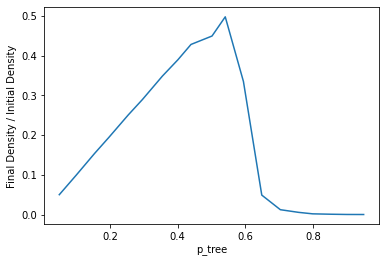

In [116]:
fig, ax = plt.subplots(1, 1)
ax.plot(initial_densities, final_densities_normalized)
ax.set(xlabel = "p_tree", ylabel = "Final Density / Initial Density")
plt.show()

> As tree density increases from [0, 0.5], final density increases. This is because trees are more scattered out and less likely to get burned by the fire. When tree density increases from (0.5, 1], final density decreases. This is because trees are more likely to be neighbors and therefore burned causing the final density to decrease. This met my expectations of what might happen

(h) Run your code for $\rho_{tree} = 0.5$ and make a movie of the dynamics.  Relate your results to the plot in part (g), and compare with the dynamics of the simulation in part (f).

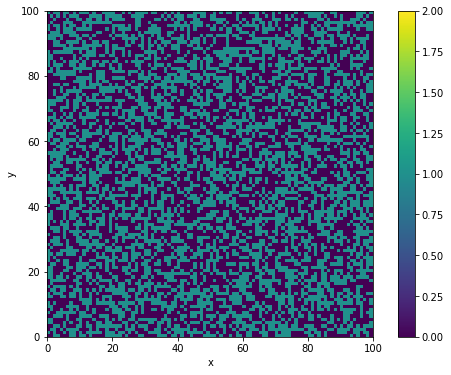

In [117]:
### code to create an animation
forest = burn_the_forest_inator_1000(100, 0.5, 1000)

# initialize figure
fig = plt.figure(figsize=(9,6))
ax = plt.subplot() 
ax.axis('square')
ax.set(xlim=(0,N),ylim=(0,N),xlabel='x',ylabel='y')

# define x- and y- axis values
x = np.arange(0,N+1)
y = np.arange(0,N+1)

# get the dimensions of the forest, specifically want the the number of iterations
sz = np.shape(forest)
iter = sz[2]

ims = []
for i in range(0,iter,1):
    trees = forest[:,:,i]
    im=ax.pcolor(x,y,trees, vmin=0, vmax=2, animated=True)
    
    if i == 0:
        # add the colorbar only to the first image
        ax.pcolor(x,y,trees, vmin=0, vmax=2)  # show an initial one first
        plt.colorbar(im)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50,repeat_delay=1000)

In [118]:
HTML(ani.to_jshtml())

> In part f, our $p_{tree}$ was 0.7. This mean that trees were more likely to be next to each other and therefore burned allowing the fire to spread throughout the system. As we saw in part g, $p_{tree}=0.5$ still contains too much randomness to allow the fire to fully spread throughout the simulation. That is why we see it burn out quickly in the above simulation.

(i) BONUS: There are several ways to make this model more realistic/complicated.  For instance, the presence of wind and the humidity are both known to play a role in how fires spread.  How might you modify the existing model to include these effects? How do you expect these effects to influence the dynamics of the fire? What other effects might be important, how might you implement them, and how do you expect the fire behavior to be influenced? Be as descriptive as you can, but you do not need to add these effects into your code.

> We can use wind strength and humidity values to insert "bias" into our simplified simulation similar to the 2D Walking Sticky simulation. However, rather than adding bias to a specific step, we add bias to a range. This will allow us to look beyond just the 4 neighbors and follow the dynamics of the environment. For example, wind blowing NE at 3 mph would indicate that we observe neighbors in the NE given a range of 3 units to spread the fire. Humidity can serve as a value which indicate how easy it is for a tree to catch fire. Other effects to include might be the temperature of the day or how close trees are to each other.

> I expect the fire to display more biased behavior rather than the simple top-down dynamics it is showing now. This biased behavior will clearly show external forces influencing how the fire moves throughout the system. Whether that be through wind, or the humidty of trees across regions, etc.

---
---

Once you're finished, please submit ***both*** an iPython notebook (.ipynb) and an HTML formatted version of your work to Canvas.


To convert your Colab notebook to an html file, you'll need to follow these steps:

(1) From within your Colab notebook, go to File --> Download --> NOTEBOOKFILE.ipynb

(2) Click on the folder icon to the left, and click the "upload" button (the icon with the page containing an up arrow). Upload the file you just downloaded.

(3) Click on the folder with the clockwise arrow to refresh the file list.

(4) Find and hover over your notebook file, click on the three vertical dots to the right, and select "Copy path"

(5) Type the following two lines of commands into a cell in your notebook, and replace the /PATH/TO/YOUR/NOTEBOOKFILE.ipynb with the path you copied:

 

%%shell

jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

In [121]:
%%shell

jupyter nbconvert --to html /content/PHYS_BIOL_212_Final_Exam_Spring_2022.ipynb

[NbConvertApp] Converting notebook /content/PHYS_BIOL_212_Final_Exam_Spring_2022.ipynb to html
[NbConvertApp] Writing 4468354 bytes to /content/PHYS_BIOL_212_Final_Exam_Spring_2022.html
